In [16]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 課題1 データの読み込み
必要技能 - NumPy / Pandas

使用するデータ - **時系列/多変量ベクトルの要素を含むデータを選定**
+ [Freeny’s Revenue Data - 小売マーケット全体の属性情報と、ある店舗の売上データ](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/freeny.csv)

参考
+ https://aidemy.net/routemaps/3
+ https://www.kaggle.com/levaniz/machine-learning-analysis-of-flights-data
+ https://www.trifields.jp/r-sample-data-491

In [2]:
df = pd.read_csv('data.csv')
df = df.rename(columns={'Unnamed: 0':'date'})
for i in range(len(df)):
    date = math.modf(df['date'][i])
    year = int(date[1])
    month = int(date[0]*100/25*3+1)
    df['date'][i] = datetime.datetime(year,month,1)

/Users/keiichirosato/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
df

,date,y,lag.quarterly.revenue,price.index,income.level,market.potential
0,1962-04-01 00:00:00,8.79236,8.79636,4.70997,5.82110,12.9699
1,1962-07-01 00:00:00,8.79137,8.79236,4.70217,5.82558,12.9733
2,1962-10-01 00:00:00,8.81486,8.79137,4.68944,5.83112,12.9774
3,1963-01-01 00:00:00,8.81301,8.81486,4.68558,5.84046,12.9806
4,1963-04-01 00:00:00,8.90751,8.81301,4.64019,5.85036,12.9831
5,1963-07-01 00:00:00,8.93673,8.90751,4.62553,5.86464,12.9854
6,1963-10-01 00:00:00,8.96161,8.93673,4.61991,5.87769,12.9900
7,1964-01-01 00:00:00,8.96044,8.96161,4.61654,5.89763,12.9943
8,1964-04-01 00:00:00,9.00868,8.96044,4.61407,5.92574,12.9992
9,1964-07-01 00:00:00,9.03049,9.00868,4.60766,5.94232,13.0033


## 課題2 ビジュアライズ
必要技能 - Matplotlib / Seaborn

### 問題
matplotlibやseabornを用いて、1の売上データを下記の通りグラフで視覚化せよ
1. 日付x-売上データyの線グラフ
2. 売上データを除く各項目の相関ヒートマップ

In [4]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])

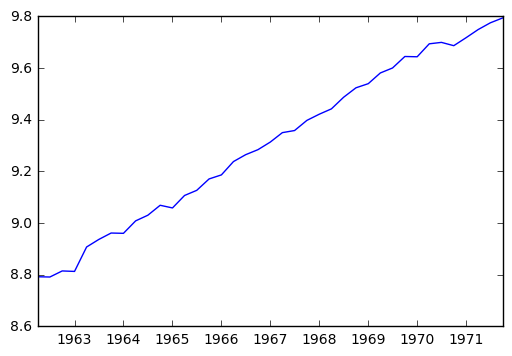

In [5]:
%matplotlib inline
plt.plot(x,y)

In [6]:
df_corr = df.drop('y', axis=1).corr()

In [7]:
df_corr

,lag.quarterly.revenue,price.index,income.level,market.potential
lag.quarterly.revenue,1.000000,-0.989417,0.981660,0.997207
price.index,-0.989417,1.000000,-0.953876,-0.989088
income.level,0.981660,-0.953876,1.000000,0.976503
market.potential,0.997207,-0.989088,0.976503,1.000000


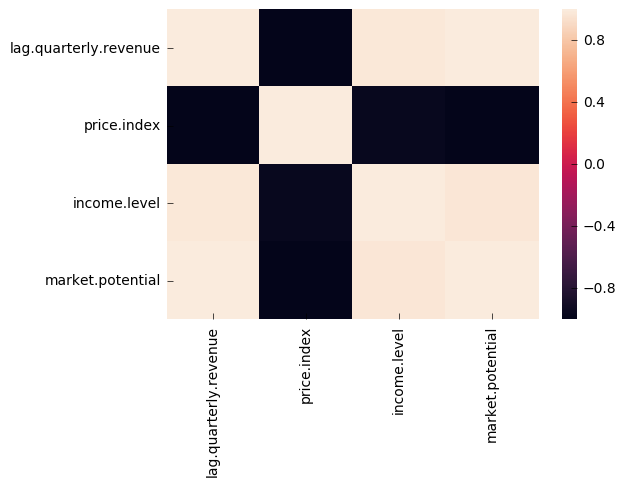

In [8]:
sns.heatmap(df_corr, vmax=1, vmin=-1)

## 課題3 因子分析
必要技能 - 回帰分析 / statsmodels

### 問題
statsmodelsを用いて、売上に最も影響を与える要因を「○○、○○」の中から選択せよ。また、それを選択した理由も述べよ。

In [11]:
y = df['y']
X = df.drop(['date', 'y'], axis=1)
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4354.
Date:                Sat, 16 Mar 2019   Prob (F-statistic):           1.51e-45
Time:                        09:21:08   Log-Likelihood:                 111.84
No. Observations:                  39   AIC:                            -213.7
Df Residuals:                      34   BIC:                            -205.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -10.4726      6.022     -1.739      0.091     -22.710       1.765
lag.quarterly.revenue     0.1239      0.142      0.870      0.390      -0.165       0.413
price.index              -0.7542      0.161     -4.693      0.000      -1.081      -0.428
income.level              0.7675      0.134      5.730      0.000       0.495       1.040
market.potential          1.3306      0.509      2.613      0.013       0.296       2.366
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.030
Skew:                          -0.061   Prob(JB):                        0.598
Kurtosis:                       2.213   Cond. No.                     4.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 課題4 時系列予測
必要技能 - ARモデル / 季節トレンド調整 / statsmodels

In [13]:
season_df = df[['date', 'y']]
season_df = season_df.set_index('date')
result = sm.tsa.seasonal_decompose(season_df.values,freq = 4)

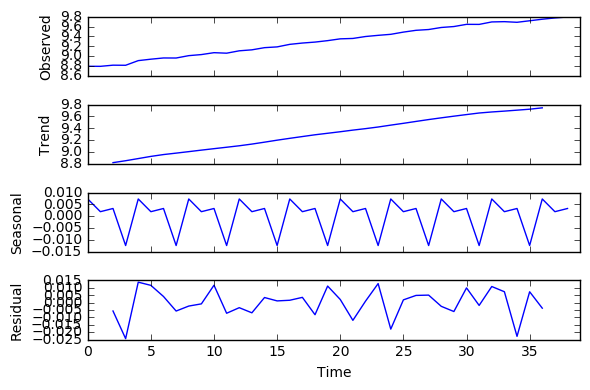

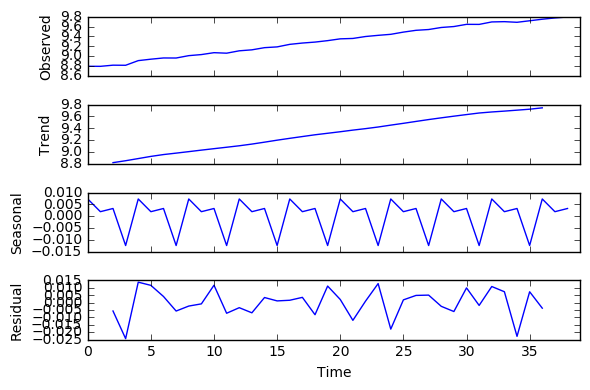

In [15]:
plt.figure()
result.plot()

## 課題5 ランダムフォレスト(マルコフモデルにする？)による予測
必要技能 - ランダムフォレスト / scikit-learn

*発展課題のため、正答率は低めに設定する予定

In [23]:
df_drop_date = df.drop('date',axis=1)
train_df, test_df = train_test_split(df_drop_date, test_size = 0.7, shuffle = False)
train_X = train_df.drop('y',axis=1)
test_X = test_df.drop('y',axis=1)
train_y = train_df['y']
test_y = test_df['y']

In [24]:
rf = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf.fit(train_X,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [26]:
pred_y = rf.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [27]:
np.sqrt(mean_squared_error(test_y, pred_y))

0.4648482950896277

In [28]:
r2_score(test_y, pred_y, multioutput='variance_weighted')

-3.44563780992224